# Dataset

In [46]:
import pandas as pd

In [137]:
data = pd.read_csv('D:/dataset.csv')

In [3]:
data.head()

,Unique Id,Image,Brand,Title,Specifications,Highlights,Price,Rating
0,0697f1714bf848c4b1cacc39a46a4e8b,https://images-na.ssl-images-amazon.com/images...,RoadPro,RoadPro RP-100C 10' AM/FM Antenna Coaxial Cable,"[{'Brand': 'RoadPro'}, {'Model': 'RP-100C'}, {...",Make sure this fits by entering your model num...,12.99,4.7
1,f04481fec10c4a538634d01e04bb45ed,https://images-na.ssl-images-amazon.com/images...,YSense,5-6 Packs Baby Girl Cute Headband - Turban Hea...,[{}],"Material: Made of elastic synthetic cotton, so...",9.99,5.0
2,754577bc25b24641ab1b0aef5e19db73,https://images-na.ssl-images-amazon.com/images...,Wooden Camera,Wooden Camera - PL Mount (Weapon/Scarlet-W/Epi...,[{'Product Dimensions': '3.2 x 1.8 x 3.2 inche...,Make sure this fits by entering your model num...,379.18,3.3
3,b4c5f6d192124d70919946ea754cce56,https://images-na.ssl-images-amazon.com/images...,Global-store,Globalstore 12x25 Folding High-Grade Binocular...,[{'Product Dimensions': '3.9 x 3.9 x 2 inches'...,Make sure this fits by entering your model num...,19.97,5.0
4,b1a1b9c3926b4da1ab0040ea81b41e3e,https://images-na.ssl-images-amazon.com/images...,GBTIGER,"120 inch Portable Projection Screen with Bag, ...","[{'Brand Name': 'GBTIGER'}, {'Item Weight': '2...",Make sure this fits by entering your model num...,27.99,3.0


In [138]:
data.drop(['Unique Id', 'Image'], inplace=True, axis=1)

In [139]:
data.dropna(inplace=True)

In [140]:
data.isnull().sum()

Brand             0
Title             0
Specifications    0
Highlights        0
Price             0
Rating            0
dtype: int64

In [141]:
for idx, row in data.iterrows():

    r = row[2]
    r = r.strip('[')
    r = r.strip(']')
    r = r.split(',')
    for thing in r:
        if 'Item Weight' in thing:
            weight = thing
            weight = weight.strip()
            for stripper in ["'", "{", "}", ":", "Item Weight"]:
                weight = weight.strip(stripper)
            weight = weight.split(':')
            weight = weight[-1]
            weight = weight.strip()
            weight = weight.strip("'")
            weight = weight.strip('ounces')
            weight = weight.strip('pound')
            weight = weight.strip()
            data.loc[idx, 'weight'] = weight

In [148]:
data.head()

,Brand,Title,Specifications,Highlights,Price,Rating,weight
0,RoadPro,RoadPro RP-100C 10' AM/FM Antenna Coaxial Cable,"[{'Brand': 'RoadPro'}, {'Model': 'RP-100C'}, {...",Make sure this fits by entering your model num...,12.99,4.7,3.2
1,YSense,5-6 Packs Baby Girl Cute Headband - Turban Hea...,[{}],"Material: Made of elastic synthetic cotton, so...",9.99,5.0,NaN
2,Wooden Camera,Wooden Camera - PL Mount (Weapon/Scarlet-W/Epi...,[{'Product Dimensions': '3.2 x 1.8 x 3.2 inche...,Make sure this fits by entering your model num...,379.18,3.3,7.7
3,Global-store,Globalstore 12x25 Folding High-Grade Binocular...,[{'Product Dimensions': '3.9 x 3.9 x 2 inches'...,Make sure this fits by entering your model num...,19.97,5.0,7.8
4,GBTIGER,"120 inch Portable Projection Screen with Bag, ...","[{'Brand Name': 'GBTIGER'}, {'Item Weight': '2...",Make sure this fits by entering your model num...,27.99,3.0,2.1


In [152]:
data["weight"]=data["weight"].astype("float64")
data["weight"]=data["weight"].fillna(data["weight"].mean())
data["weight"].isnull().sum()

0

In [197]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
mean = 0
row_count = 0
for row in data['Price']:
    if row != 'not_available':
        mean += float(row)
        row_count += 1

In [200]:
mean = mean / row_count

In [201]:
for idx, row in data.iterrows():
    if row['Price'] == 'not_available':
        data.loc[idx, 'Price'] = mean

In [243]:
data["Price"].isnull().sum()

0

In [227]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [228]:
data["Brand"]=l.fit_transform(data["Brand"])
data["Title"]=l.fit_transform(data["Title"])


In [229]:
data["Price"].astype("float")
data["Rating"].astype("float")
data["Title"].astype("float")
data["Brand"].astype("float")

0        18145.0
1        23699.0
2        23325.0
3         9087.0
4         8643.0
5         3799.0
6         9295.0
7        16809.0
8         3413.0
9         2315.0
10        6977.0
11        2959.0
12       14591.0
13       21885.0
14       17770.0
15       23778.0
16       14725.0
17       14818.0
18        3737.0
19        8762.0
20       13654.0
21        9176.0
22       22529.0
23        9668.0
24       20637.0
25       13223.0
26       23484.0
27       23433.0
28       10308.0
29       25727.0
          ...   
51470     3277.0
51471    24651.0
51472    17874.0
51473      833.0
51474     1461.0
51475    21481.0
51476    24363.0
51477    10521.0
51478    20588.0
51479    24434.0
51480    24715.0
51481    24708.0
51482    20556.0
51483    23701.0
51484    18133.0
51485    15747.0
51486    24478.0
51487     6236.0
51488    20690.0
51489     5228.0
51490    24679.0
51491    15525.0
51492    24356.0
51493    20000.0
51494    16621.0
51495    13311.0
51496    22944.0
51497    24500

In [289]:
x = data.drop('Price', axis=1)

In [290]:


X_train, X_test, y_train, y_test = train_test_split(x.iloc[:, :], data['Price'])

In [292]:
X_train.keys()


Index(['Brand', 'Title', 'Specifications', 'Highlights', 'Rating', 'weight'], dtype='object')

In [293]:
X_train.drop(['Specifications', 'Highlights'], inplace=True, axis=1)
X_test.drop(['Specifications', 'Highlights'], inplace=True, axis=1)

C:\Users\tharu\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [294]:
rfr = RandomForestRegressor()

In [295]:
rfr.fit(X_train, y_train)

C:\Users\tharu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [236]:
X_test.head(2)

,Brand,Title,Rating,weight
11328,23207,47844,0.0,5.433714
41315,20708,42363,4.4,1.460000


In [282]:
y_test.head(2)

11328    14.99
41315    15.99
Name: Price, dtype: object

In [300]:
pred=rfr.predict(X_test)
pred=pd.DataFrame(pred)
y_pred_df = pd.DataFrame( pred)
df_out = pd.merge(data, y_pred_df, how = 'left', left_index = True, right_index = True)
df_out

,Brand,Title,Specifications,Highlights,Price,Rating,weight,0
0,18145,37180,"[{'Brand': 'RoadPro'}, {'Model': 'RP-100C'}, {...",Make sure this fits by entering your model num...,12.99,4.7,3.200000,38.045000
1,23699,1426,[{}],"Material: Made of elastic synthetic cotton, so...",9.99,5.0,5.433714,58.904000
2,23325,48261,[{'Product Dimensions': '3.2 x 1.8 x 3.2 inche...,Make sure this fits by entering your model num...,379.18,3.3,7.700000,47.046349
3,9087,18489,[{'Product Dimensions': '3.9 x 3.9 x 2 inches'...,Make sure this fits by entering your model num...,19.97,5.0,7.800000,33.168000
4,8643,365,"[{'Brand Name': 'GBTIGER'}, {'Item Weight': '2...",Make sure this fits by entering your model num...,27.99,3.0,2.100000,160.357000
5,3799,6971,[{'Product Dimensions': '16.5 x 3.5 x 13.5 inc...,Make sure this fits by entering your model num...,449,5.0,18.500000,55.571000
6,9295,17588,[{'Package Dimensions': '6.8 x 3.4 x 1.2 inche...,Make sure this fits by entering your model num...,57.6927,0.0,3.360000,71.902000
7,16809,8725,"[{'Product Dimensions': '13 x 8 x 23 inches'},...",Make sure this fits by entering your model num...,999,0.0,12.800000,55.075079
8,3413,6255,"[{'Item Weight': '4.2 ounces'}, {'Package Dime...","Beautiful and luxurious, high quality sparkle ...",5.87,0.0,4.200000,44.552000
9,2315,10511,[{'Package Dimensions': '6.9 x 2.2 x 0.5 inche...,Compatible with: FITBIT VERSA\nIncludes 2 Quic...,16.95,0.0,0.480000,87.634000


In [301]:
rfr.score(X_test, y_test)


In [273]:
x1=data.iloc[:,5:6]
y1=data["Price"]

In [274]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1,test_size=0.2)

In [275]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [276]:
lr.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [277]:
lr.predict(X1_test)

array([86.27222957, 43.48329327, 86.27222957, ..., 44.58044548,
       86.27222957, 86.27222957])

In [279]:
lr.score(X1_test,y1_test)

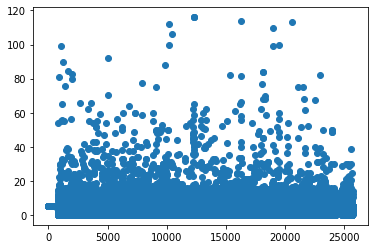

In [328]:
import matplotlib.pyplot as plt
plt.scatter(data["Brand"],data["weight"])
plt.show()

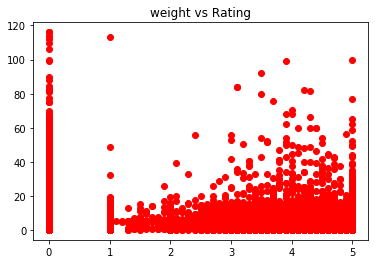

In [318]:
plt.scatter(data["Rating"], data["weight"], color='red')

plt.title("weight vs Rating")

plt.show()

(array([8322., 4472., 4926., 4837., 4479., 4757., 4681., 4747., 4885.,
        5388.]),
 array([    0. ,  2573.9,  5147.8,  7721.7, 10295.6, 12869.5, 15443.4,
        18017.3, 20591.2, 23165.1, 25739. ]),
 <a list of 10 Patch objects>)

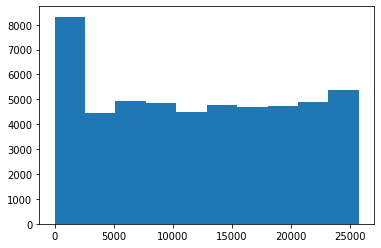

In [324]:
plt.hist( data["Brand"])